 
  
##  Описание данных
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы долларов)  
EU_sales — продажи в Европе (миллионы долларов)  
JP_sales — продажи в Японии (миллионы долларов)  
Other_sales — продажи в других странах (миллионы долларов)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. 

In [136]:
# Импортируем все необходимые библиотеки:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [137]:
# Просмотрим общую информацию о данных:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
games = pd.read_csv('/datasets/games.csv')
print(games.info())
games.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Вывод.
Данные представлены одним файлом '/datasets/games.csv', на основе которого создана таблица 'games'.
Получена первоначальная информация о таблице. Имеется множество пропущенных значений в 3 столбцах с рейтингами. Следует привести к нужным типам данные в столбцах 'release_year' и 'user_score', привести к нижнему регистру названия столбцов и по возможности обработать пропуски.

## 2. Подготовка данных.

In [138]:
# Приведем к нижнему регистру названия столбццов:
games.columns = ['name', 'platform', 'release_year', 
                 'genre','na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

games.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [139]:

# удалим пропущенные значения даты выхода игры  и игры без названия:
games.dropna(subset = ['release_year'], inplace = True)

# приведем рейтинг критиков к 10 балльной шкале:
games['critic_score'] =  (games['critic_score'] / 10).round(1)

# приведем год релиза к целочисленному типу:
games['release_year'] = games['release_year'].astype(int)

# заменим значения рейтинга "tbd" в "user_score" на значения из "critic_score" если эти значения имеются:

def score(row):
    if row['critic_score'] != (np.nan, None) and row['user_score'] == 'tbd':
        return row['critic_score']
    return row['user_score']

games['user_score'] = games.apply(score, axis=1)
games['user_score'] =  pd.to_numeric(games['user_score'], errors='coerce')

games['critic_score'] = games['critic_score'].fillna('s')

# Также заменим пропущенные значения в "critic_score" на значения из "user_score"

def score1(row):
    if row['critic_score'] == 's' and row['user_score'] != 'tbd':
        return row['user_score']
    else:
        return row['critic_score']
    

games['critic_score'] = games.apply(score1, axis=1)


In [140]:
# Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']



In [141]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
name            16444 non-null object
platform        16446 non-null object
release_year    16446 non-null int64
genre           16444 non-null object
na_sales        16446 non-null float64
eu_sales        16446 non-null float64
jp_sales        16446 non-null float64
other_sales     16446 non-null float64
critic_score    8552 non-null float64
user_score      8519 non-null float64
rating          9768 non-null object
total_sales     16446 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


## 3. Исследовательский анализ данных:

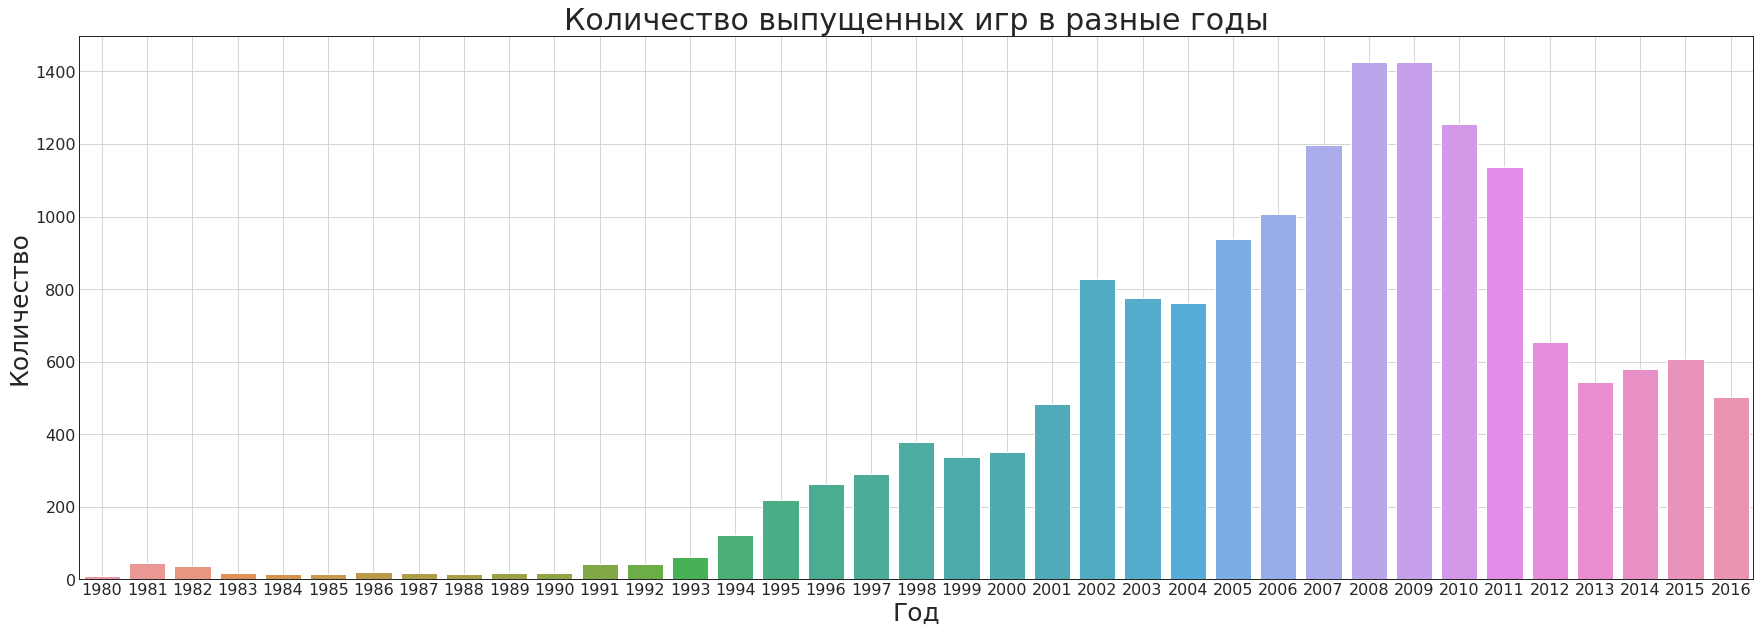

In [142]:
# Посмотрим сколько игр впускалось в разные годы:

plt.figure(figsize=(30,10))
sns.countplot(x='release_year', data=games)
plt.title('Количество выпущенных игр в разные годы', size=30)
plt.ylabel('Количество', size=25)
plt.xlabel('Год', size=25)
plt.grid(True)


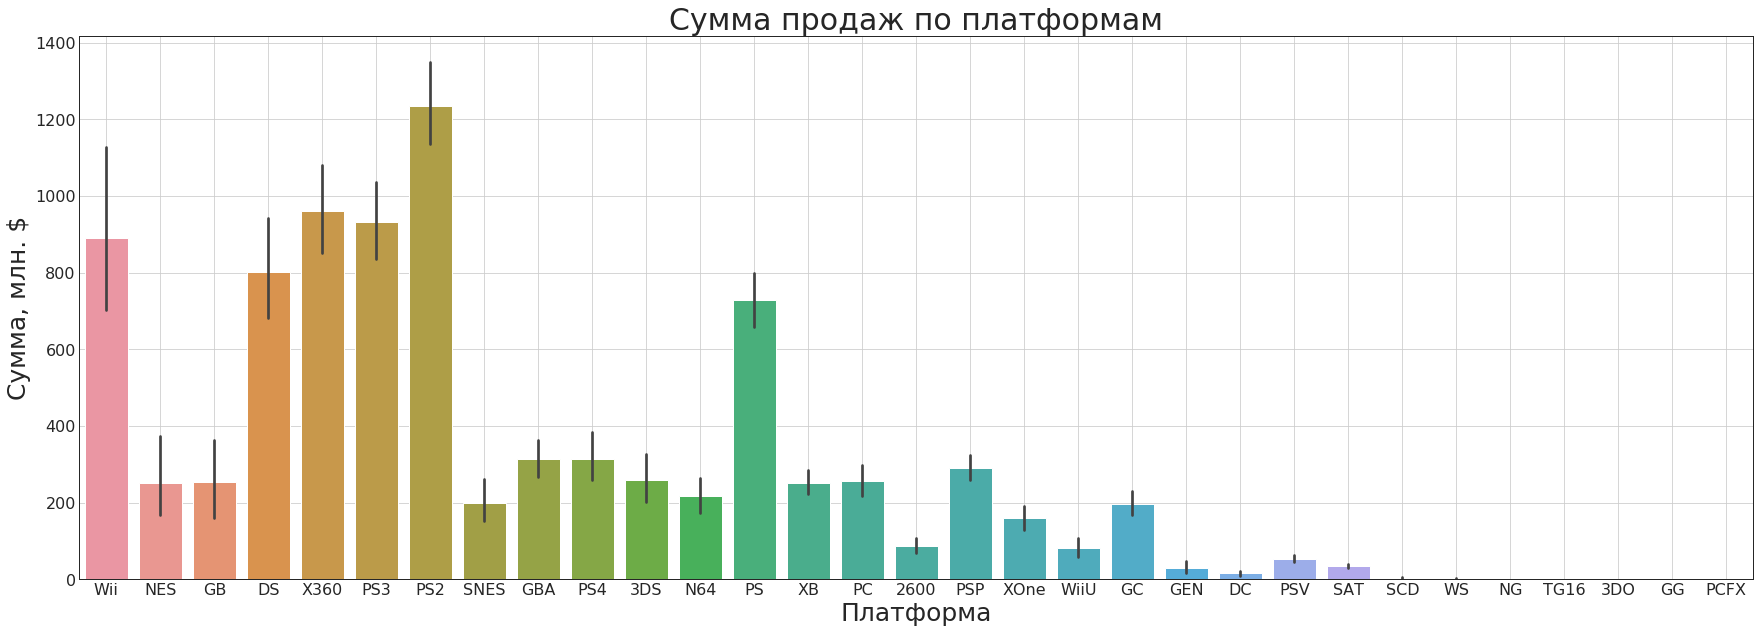

In [143]:
# Построим график суммарных продаж для каждой платформы: 

plt.figure(figsize=(30,10))
sns.barplot(x='platform', y='total_sales',  data=games, estimator=sum)
plt.title('Сумма продаж по платформам', size=30)
plt.ylabel('Сумма, млн. $', size=25)
plt.xlabel('Платформа', size=25)
plt.grid(True)


In [144]:
# Для 6 платформ с наибольшими суммарными продажами построим графики распределения суммарных продаж по годам:

def barplot_pl(platform):
    plt.figure(figsize=(15,5))
    sns.barplot(x='release_year', y='total_sales',  data=games.query('platform == @platform'), estimator=sum)
    print('Сумма продаж платформы', platform, 'по годам')
    plt.ylabel('Сумма, млн. $', size=15)
    plt.xlabel('Год', size=15)
    plt.grid(True)
    plt.show()
    
 

Сумма продаж платформы PS2 по годам


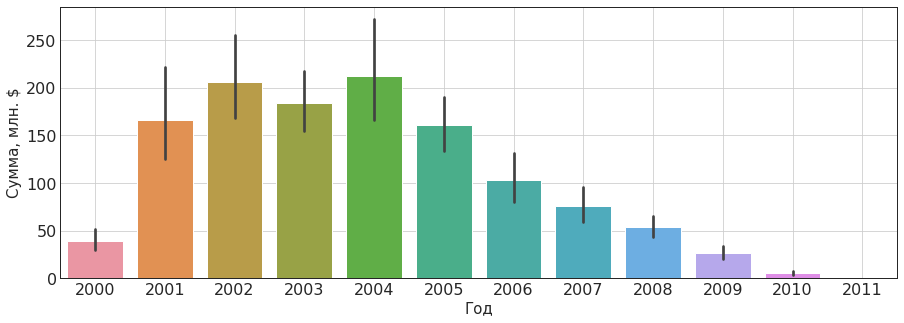

Сумма продаж платформы X360 по годам


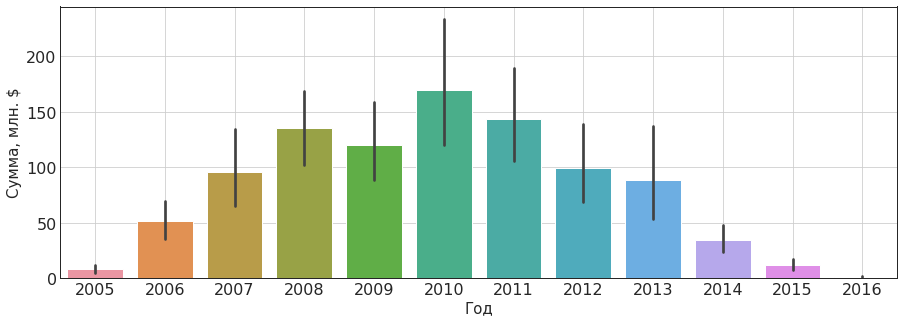

Сумма продаж платформы PS3 по годам


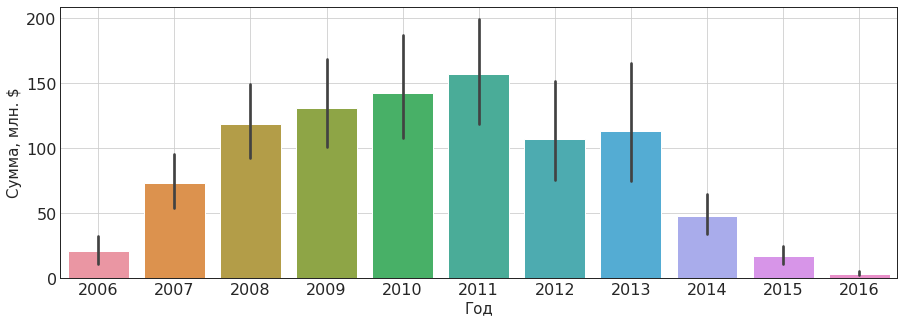

Сумма продаж платформы Wii по годам


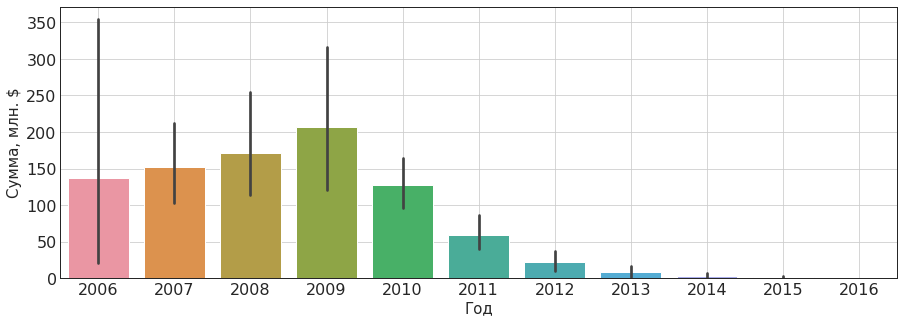

Сумма продаж платформы DS по годам


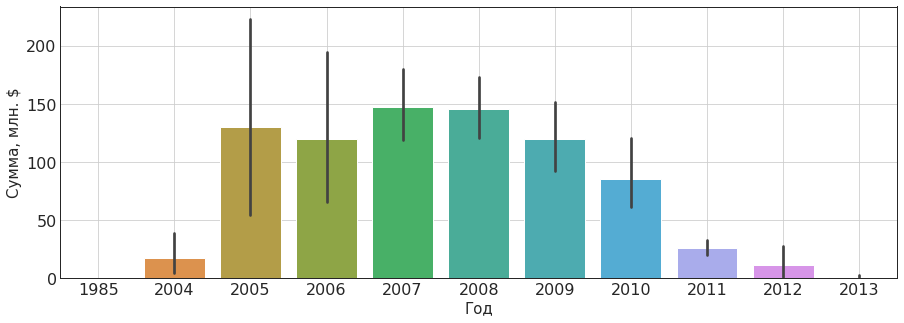

Сумма продаж платформы PS по годам


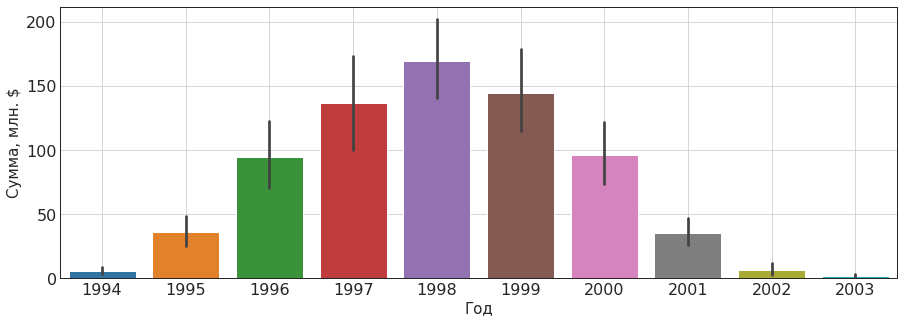

In [145]:
for platform in games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6).index:
    barplot_pl(platform)

По графикам видим, что средний срок жизни платформы составляет 10 лет (5 лет рост и 5 -падение продаж). Примем за актуальный период 5 лет. Соответственно далее будем учитывать данные только с 2012 года.

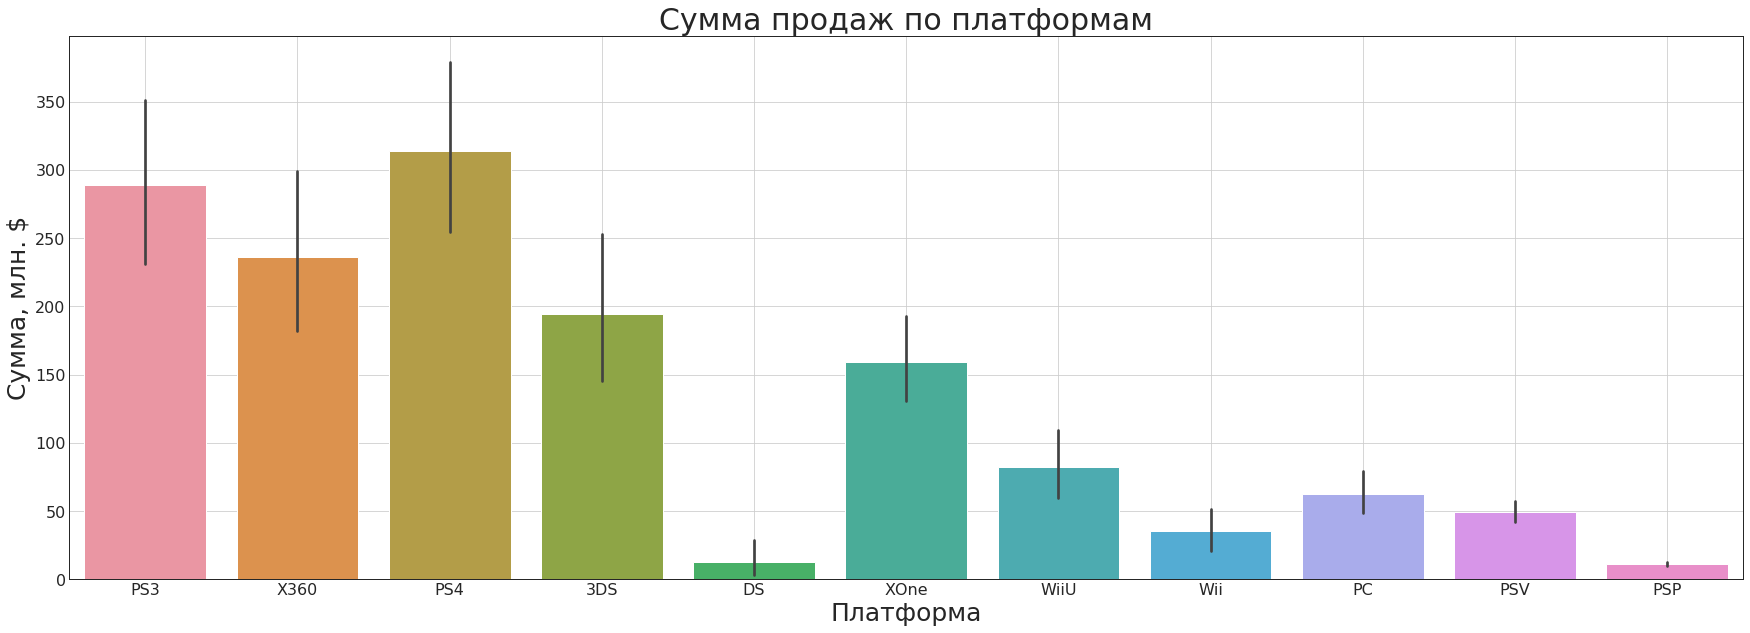

In [146]:
# Создадим таблицу с данными за актуальный период:

actual_data = games.query('release_year >= 2012').reset_index()

# Построим график суммарных продаж по платформам:

plt.figure(figsize=(30,10))
sns.barplot(x='platform', y='total_sales',  data=actual_data, estimator=sum)
plt.title('Сумма продаж по платформам', size=30)
plt.ylabel('Сумма, млн. $', size=25)
plt.xlabel('Платформа', size=25)
plt.grid(True)

Сумма продаж платформы PS3 по годам


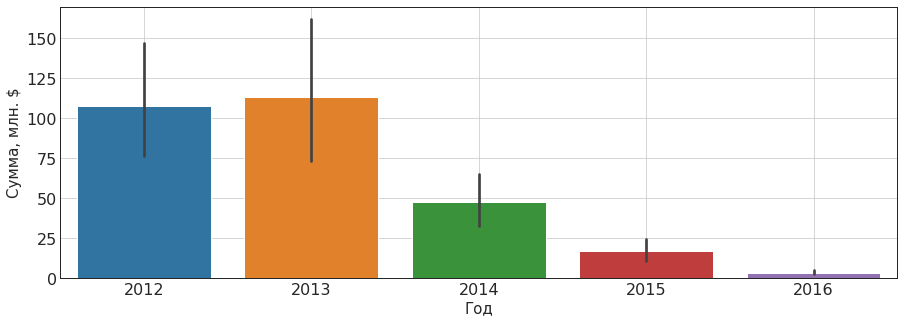

Сумма продаж платформы X360 по годам


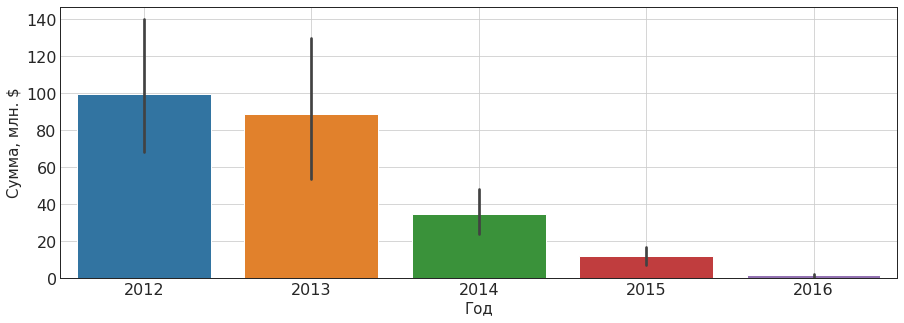

Сумма продаж платформы PS4 по годам


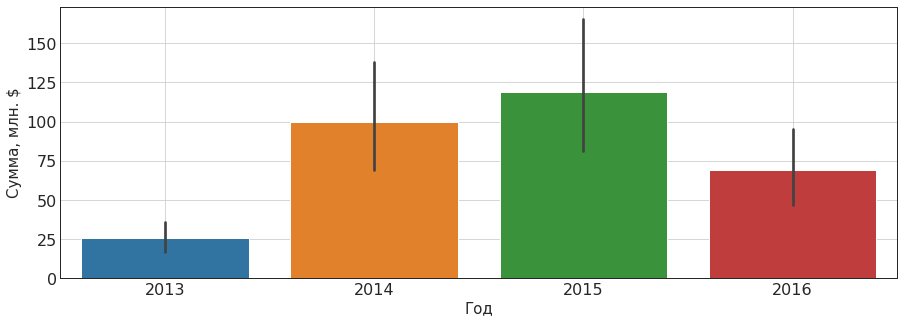

Сумма продаж платформы 3DS по годам


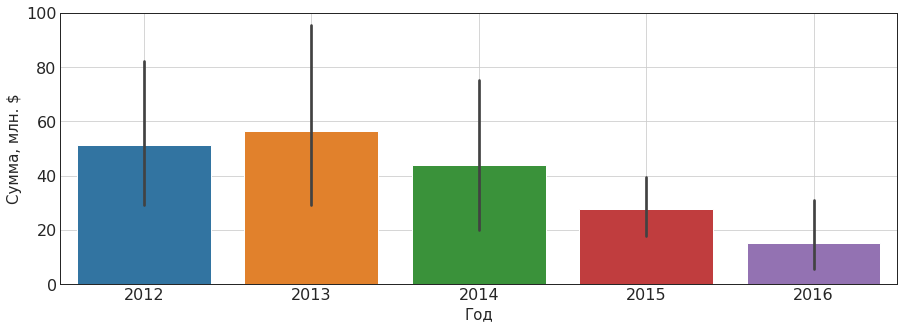

Сумма продаж платформы DS по годам


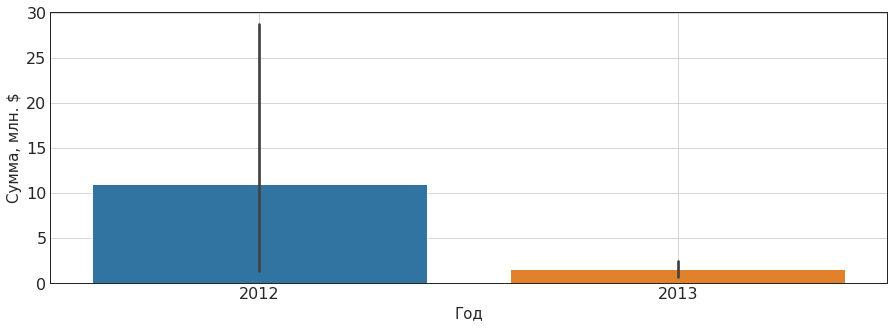

Сумма продаж платформы XOne по годам


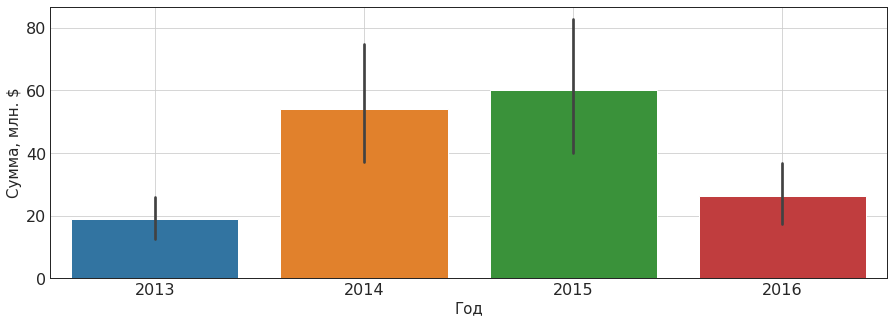

Сумма продаж платформы WiiU по годам


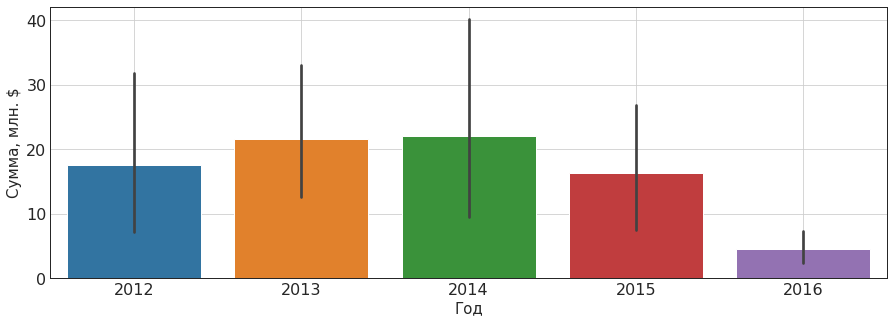

Сумма продаж платформы Wii по годам


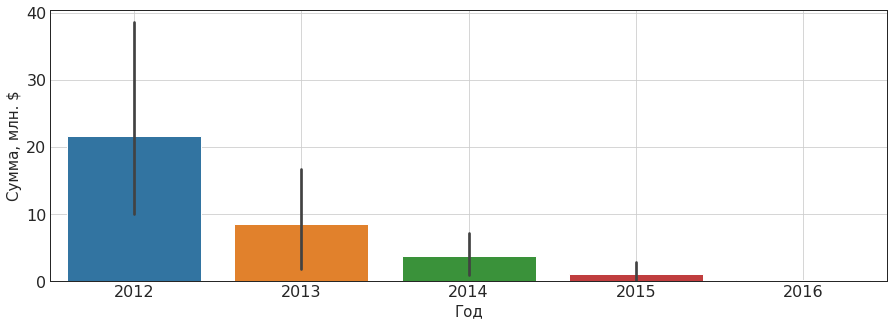

Сумма продаж платформы PC по годам


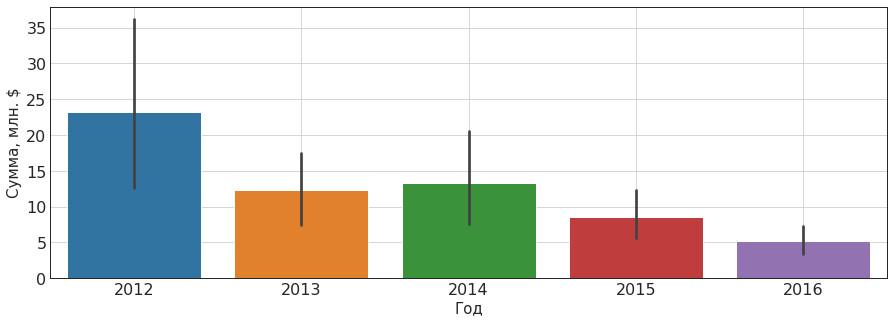

Сумма продаж платформы PSV по годам


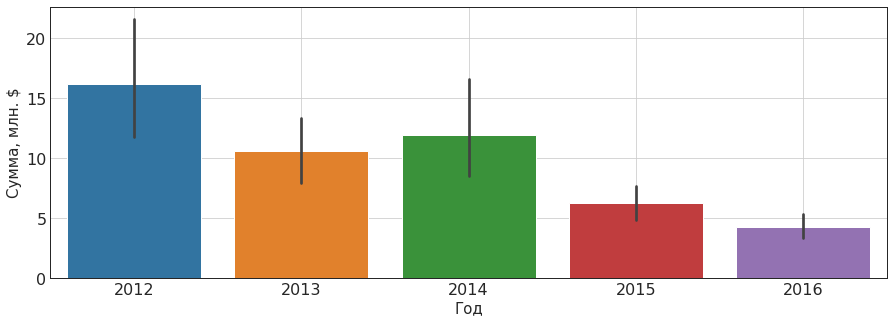

Сумма продаж платформы PSP по годам


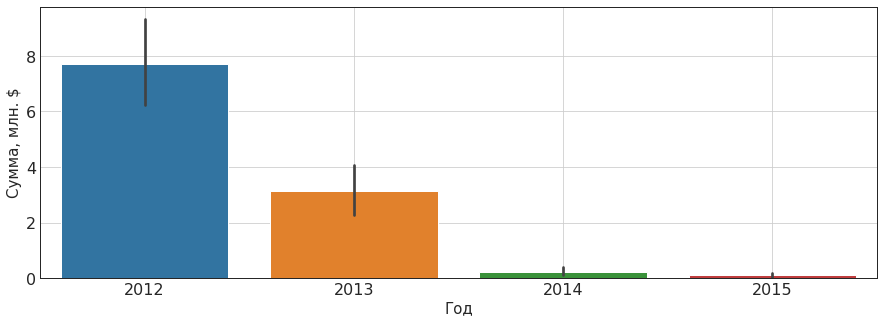

In [147]:
# Построим графики суммарных продаж по годам для каждой платформы:
def barplot_act(platform):
    plt.figure(figsize=(15,5))
    sns.barplot(x='release_year', y='total_sales',  data=actual_data.query('platform == @platform'), estimator=sum)
    print('Сумма продаж платформы', platform, 'по годам')
    plt.ylabel('Сумма, млн. $', size=15)
    plt.xlabel('Год', size=15)
    plt.grid(True)
    plt.show()
for platform in actual_data['platform'].unique():
    barplot_act(platform)


Учитывая, что данные за 2016 год могут быть неполными видим, что продажи растут у 2 платформ- PS4 и XOne. У 4 платформ
(PC, WiiU, PSV, 3DS) суммы продаж медленно снижаются, но пока остаются на приемлемом уровне. Для остальных 5 платформ(PS3, X360, Wii, PSP, DS) характерно резкое снижение суммы продаж за последние годы. Потенциально прибыльные платформы - PS4, XOne, 3DS, WiiU, PC.

Text(0.5, 0, 'Платформа')

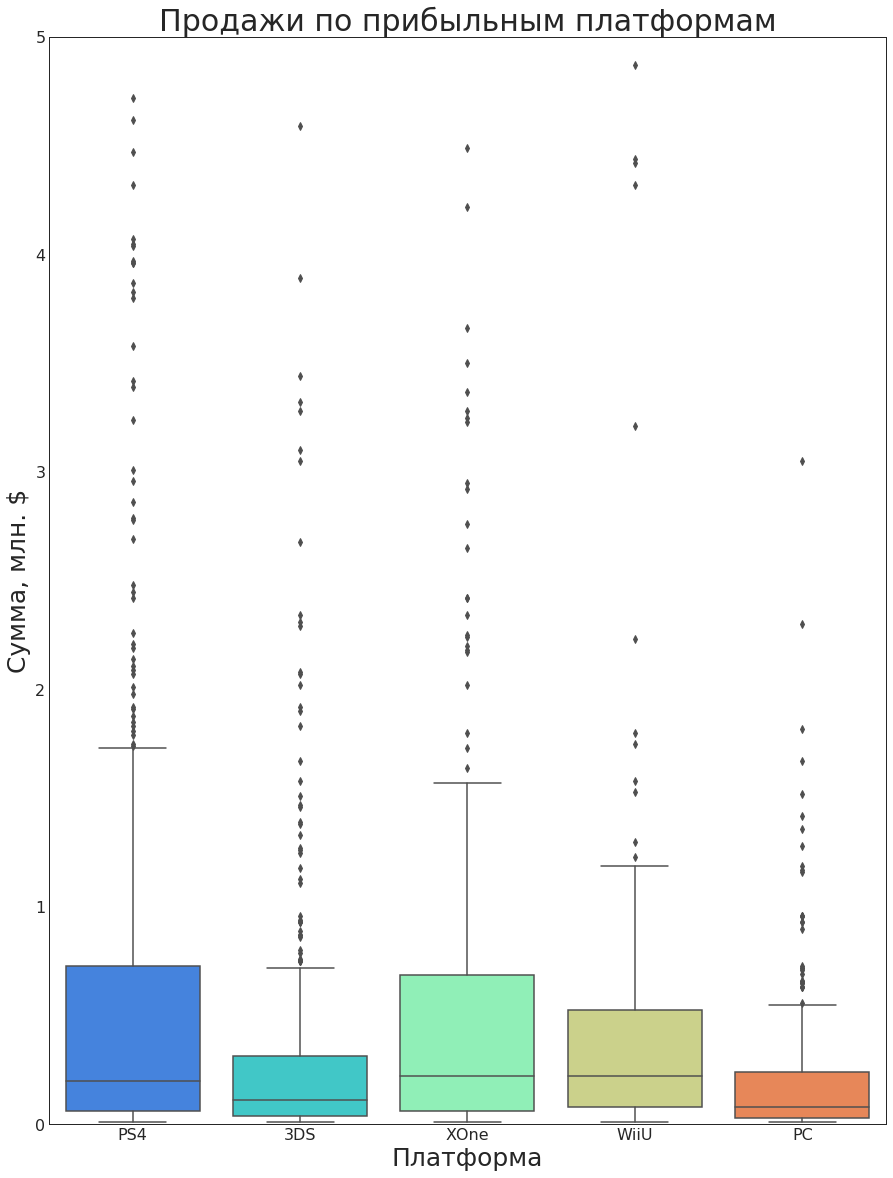

In [148]:
#  Построим график "ящик с усами" по глобальным продажам игр с разбивкой для этих платформ:


plt.figure(figsize=(15,20))
sns.boxplot(x='platform', y='total_sales', data=actual_data
            .query('platform in ("PS4", "XOne", "3DS", "WiiU", "PC")'), palette='rainbow')

plt.ylim(0, 5)
plt.title('Продажи по прибыльным платформам', size=30)
plt.ylabel('Сумма, млн. $', size=25)
plt.xlabel('Платформа', size=25)
#  


Корреляция между отзывами критиков и продажами игр: 0.4009032235925668
Корреляция между отзывами игроков и продажами игр: -0.03266417206466263


Text(0.5, 49.99999999999995, 'Отзывы игроков')

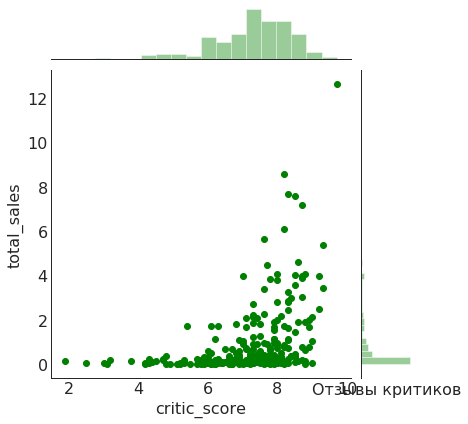

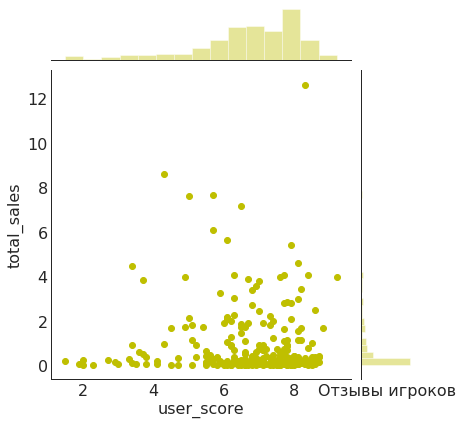

In [149]:
# Посмотрим, как влияют на продажи внутри одной популярной платформы(PS4) отзывы пользователей и критиков:

print('Корреляция между отзывами критиков и продажами игр:', actual_data
      .query('platform == "PS4"')['critic_score'].corr(actual_data.query('platform == "PS4"')['total_sales']))
sns.jointplot(x='critic_score', y='total_sales', data=actual_data.query('platform == "PS4"'), kind='scatter', color='g')
plt.xlabel('Отзывы критиков')

print('Корреляция между отзывами игроков и продажами игр:', actual_data
      .query('platform == "PS4"')['user_score'].corr(actual_data.query('platform == "PS4"')['total_sales']))
sns.jointplot(x='user_score', y='total_sales', data=actual_data.query('platform == "PS4"'), kind='scatter', color='y')
plt.xlabel('Отзывы игроков')



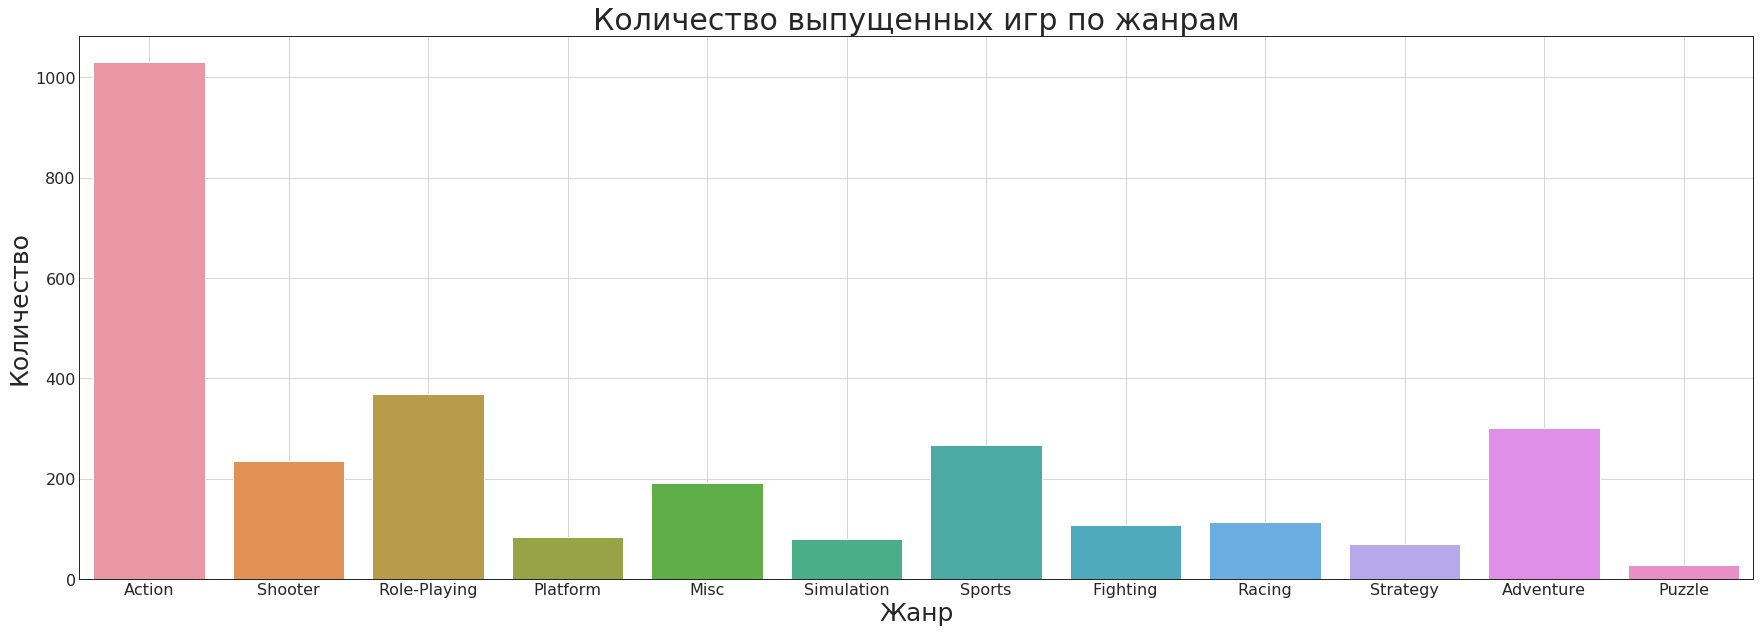

In [150]:
# Посмотрим на общее распределение игр по жанрам:

plt.figure(figsize=(30,10))
sns.countplot(x='genre', data=actual_data)
plt.title('Количество выпущенных игр по жанрам', size=30)
plt.ylabel('Количество', size=25)
plt.xlabel('Жанр', size=25)
plt.grid(True)

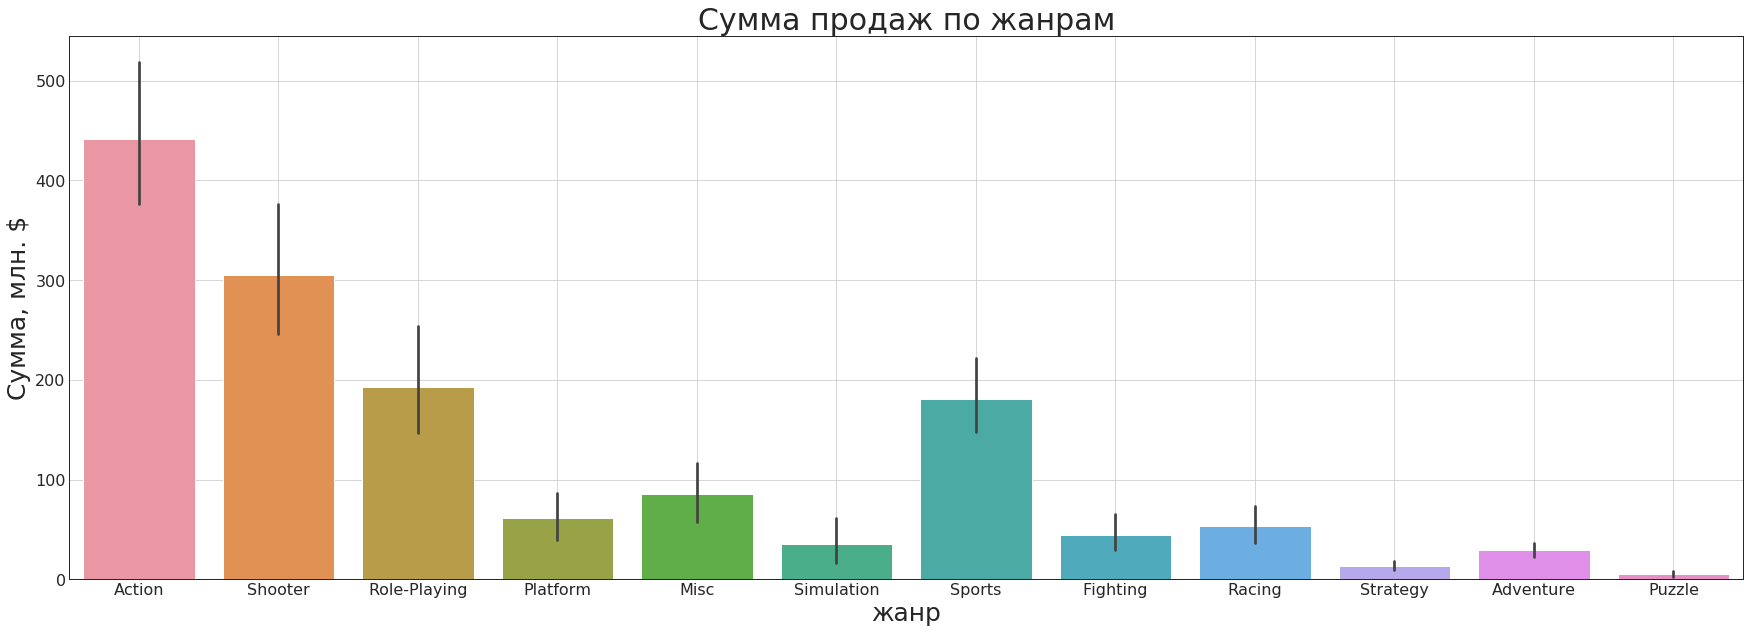

In [151]:
# Посмотрим на общую прибыль игр по жанрам:

plt.figure(figsize=(30,10))
sns.barplot(x='genre', y='total_sales',  data=actual_data, estimator=sum)
plt.title('Сумма продаж по жанрам', size=30)
plt.ylabel('Сумма, млн. $', size=25)
plt.xlabel('жанр', size=25)
plt.grid(True)

## Вывод.
Проведен исследовательский анализ данных. Посчитано количество выпущенных игр по жанрам. Принят актуальный период 5 лет (половина от средней продолжительности жизни платформы). Соответственно далее в анализе учитывались данные с 2012 года. По продажам лидируют платформы PS4 и XOne. Этим же платформам характерен рост продажв последние годы. Далее выбраны 5 потенциально прибыльных платформ: PS4, XOne, 3DS, WiiU и PC. По этим платформам построена диаграмма размаха для суммы продаж. Присутствует заметная корреляция между отзывами критиков и продажами игр, тогда как между отзывами игроков и продажами игр корреляция практически осутствует. Самые прибыльные жанры игр: Action, Shooter, Role-Playing, Sports. Они же лидируют по кол-ву выпущенных игр + жанр Adventure. Самые низкие прибыли у игр с жанрами Strategy и Puzzle.

## 4. Портрет пользователя каждого региона.

In [152]:
# Определим для пользователя каждого региона (NA, EU, JP):
# Самые популярные платформы (топ-5):
def top5_pl_reg(region):
    plt.figure(figsize=(10,5))
    sns.barplot(x='platform', y=region,  data=actual_data, estimator=sum)
    plt.ylabel('Сумма, млн. $', size=14)
    plt.xlabel('Платформа', size=14)
    plt.grid(True)

Топ-5 платформ в Северной Америке platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64


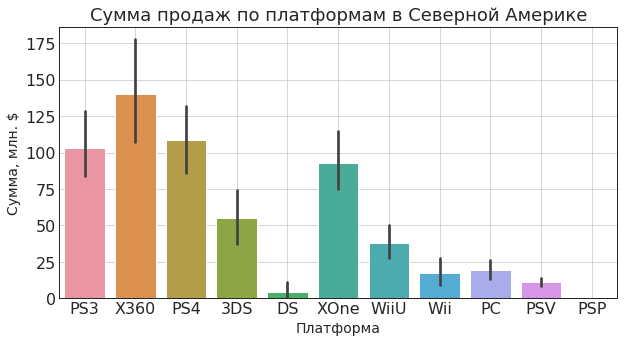

In [153]:
# Для региона NA:

top5_pl_reg('na_sales')
plt.title('Сумма продаж по платформам в Северной Америке', size=18)
print('Топ-5 платформ в Северной Америке', actual_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head())

Топ-5 платформ в Европе platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64


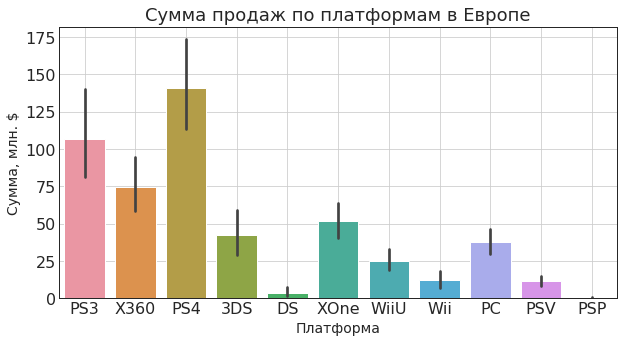

In [154]:
# Для региона Европа:

top5_pl_reg('eu_sales')
plt.title('Сумма продаж по платформам в Европе', size=18)
print('Топ-5 платформ в Европе', actual_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head())

Топ-5 платформ в Японии platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64


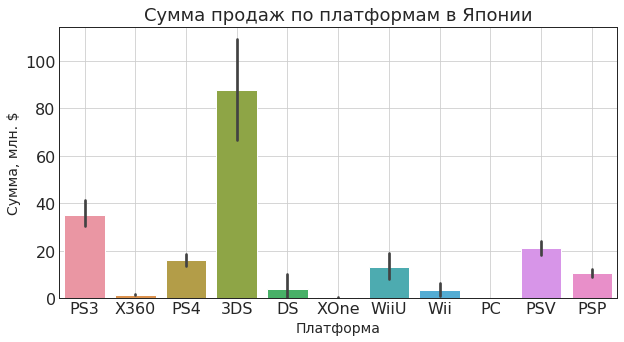

In [155]:
# Для региона Япония:

top5_pl_reg('jp_sales')
plt.title('Сумма продаж по платформам в Японии', size=18)
print('Топ-5 платформ в Японии', actual_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head())

In [156]:
# Самые популярные жанры (топ-5):

def top5_genre_reg(region):
    plt.figure(figsize=(18,5))
    sns.barplot(x='genre', y=region,  data=actual_data, estimator=sum)
    plt.ylabel('Сумма, млн. $', size=14)
    plt.xlabel('Жанр', size=14)
    plt.grid(True)

Топ-5 жанров в Северной Америке genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64


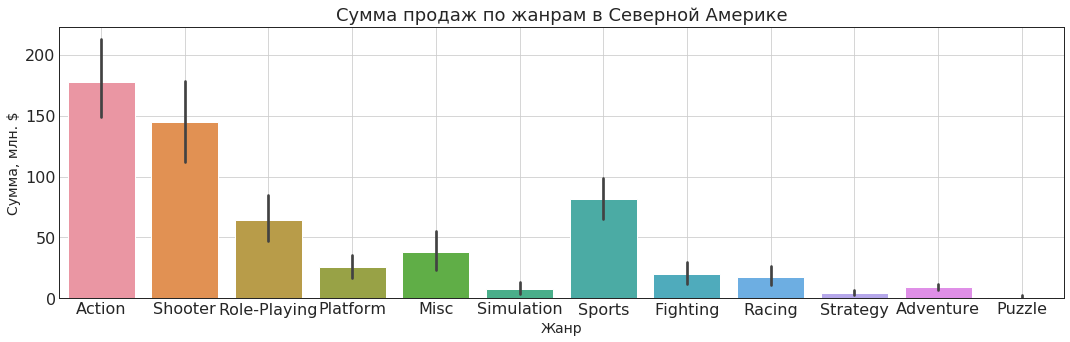

In [157]:
# Для региона Северная Америка:

top5_genre_reg('na_sales')
plt.title('Сумма продаж по жанрам в Северной Америке', size=18)
print('Топ-5 жанров в Северной Америке', actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head())

Топ-5 жанров в Европе genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64


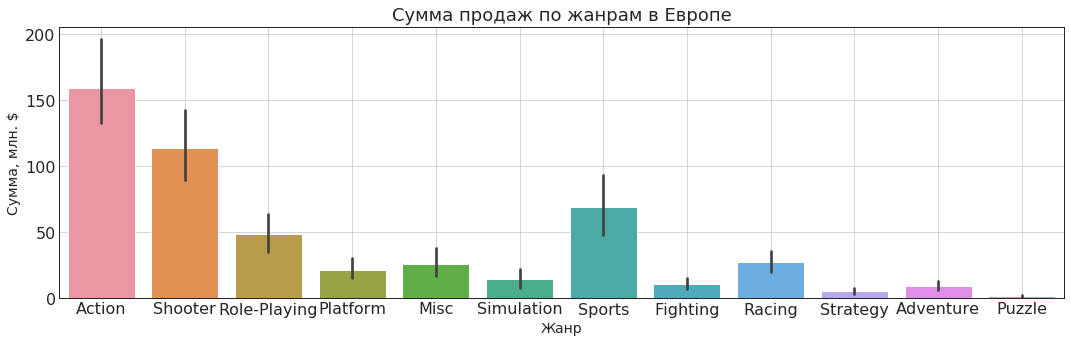

In [158]:
# Для региона Европа:

top5_genre_reg('eu_sales')
plt.title('Сумма продаж по жанрам в Европе', size=18)
print('Топ-5 жанров в Европе', actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head())

Топ-5 жанров в Японии genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64


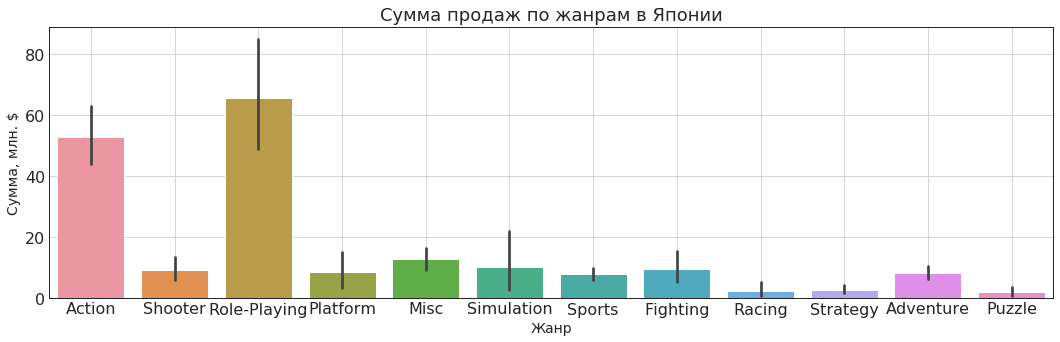

In [159]:
# Для региона Япония:

top5_genre_reg('jp_sales')
plt.title('Сумма продаж по жанрам в Японии', size=18)
print('Топ-5 жанров в Японии', actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head())

In [160]:
# Влияние рейтинга ESRB на продажи в отдельном регионе:

def ESRB_by_reg(region):
    plt.figure(figsize=(10,5))
    sns.barplot(x='rating', y=region,  data=actual_data, estimator=sum)
    plt.ylabel('Сумма, млн. $', size=14)
    plt.xlabel('Рейтинг', size=14)
    plt.grid(True)

Text(0.5, 1.0, 'Сумма продаж по рейтингам в Северной Америке')

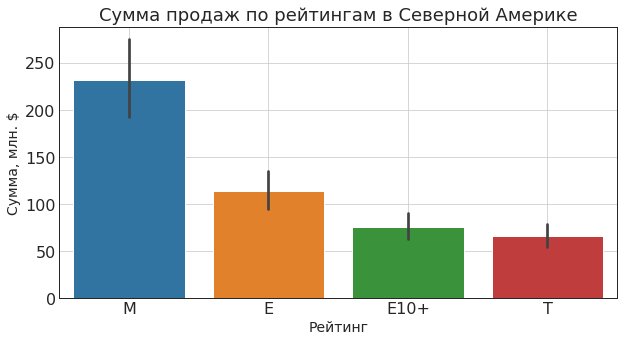

In [161]:
# Для региона Северная Америка:

ESRB_by_reg('na_sales')
plt.title('Сумма продаж по рейтингам в Северной Америке', size=18)


Text(0.5, 1.0, 'Сумма продаж по рейтингам в Европе')

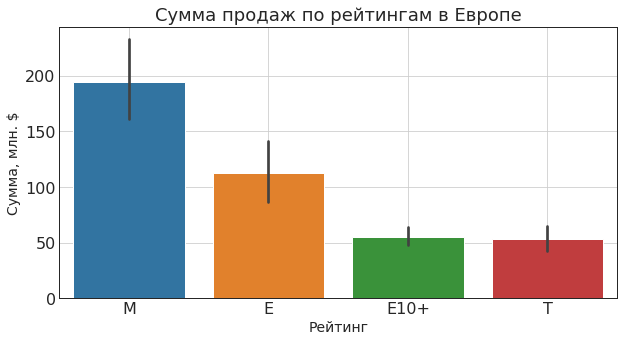

In [162]:
# Для региона Европа:

ESRB_by_reg('eu_sales')
plt.title('Сумма продаж по рейтингам в Европе', size=18)


Text(0.5, 1.0, 'Сумма продаж по рейтингам в Японии')

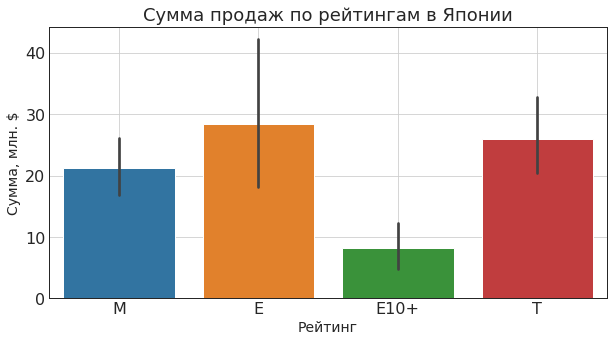

In [163]:
# Для региона Япония:

ESRB_by_reg('jp_sales')
plt.title('Сумма продаж по рейтингам в Японии', size=18)


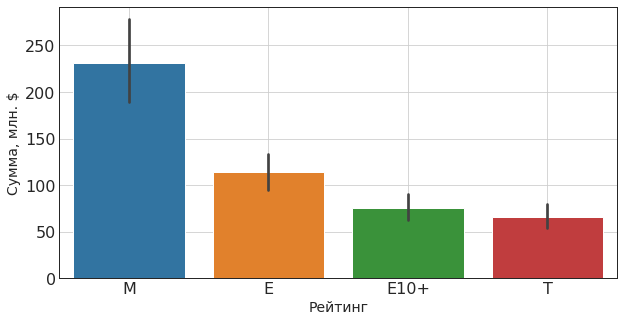

In [164]:
plt.figure(figsize=(10,5))
sns.barplot(x='rating', y='na_sales',  data=actual_data, estimator=sum)
plt.ylabel('Сумма, млн. $', size=14)
plt.xlabel('Рейтинг', size=14)
plt.grid(True)

## Вывод.
Составлен портрет пользователя каждого региона(Северная Америка, Европа, Япония).  
5 самых популярных платформ:  
в Северной Америке: X360, PS4, PS3, XOne, 3DS;  
в Европе: PS4, PS3, X360, XOne, 3DS;
в Японии: 3DS, PS3, PSV, PS4, WiiU
В Северной Америке и Европе лидируют по продажам X360 и PS4. В японии же с большим отрывом лидирует 3DS, кроме того в Японии в топ 5 платформ 2 платформы которые не входят в топ ни в Америке ни в Европе.  

Топ популярных жанров: 
и для Америки и для Европы самые популярные жанры совпадают: Action, Shooter, Sports, Role, Misc(Racing для Европы);  
в Японии топ 5 жанров выглядит по другому: Role-Playing и Action с большим отрывом от Misk, Simulation и Fighting.
Taкже Япония отличается и по продажам игр в зависимомти от рейтинга ESRB: E(для всех от 6 лет), T(подроскам от 13+), М(для взрослых от 17 лет) и Е10+(от 10 лет и старше). В Америке и Европе: М, Е, Е10+, Т.  

## 5. Проверка гипотез.

Проверим гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые":
Примем за нулевую гипотезу Но: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Тогда альтернативная гипотеза Н1: средние пользовательские рейтинги платформ Xbox One и PC разные.

In [165]:
# зададим критический уровень статистической значимости:
alpha = 0.05 

# проверим гипотезу о равенстве средних двух независимых совокупностей:
results = st.ttest_ind(
    actual_data.query('platform == "XOne" and user_score >= 0')['user_score'], 
    actual_data.query('platform == "PC" and user_score >= 0')['user_score']) 
# выведим на экран получившееся p-значение:
print('p-значение:', results.pvalue) 
# сравним получившееся p-значение с заданным уровнем статистической значимости:
if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5880271996535487
Не получилось отвергнуть нулевую гипотезу


Проверим гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные":
Примем за нулевую гипотезу Но: средние пользовательские рейтинги жанров Action и Sports одинаковые. Тогда альтернативная гипотеза Н1: средние пользовательские рейтинги жанров Action и Sports разные.

In [166]:
# зададим критический уровень статистической значимости:
alpha = 0.05 

# проверим гипотезу о равенстве средних двух независимых совокупностей:
results = st.ttest_ind(
    actual_data.query('genre == "Action" and user_score >= 0')['user_score'], 
    actual_data.query('genre == "Sports" and user_score >= 0')['user_score']) 

# выведим на экран получившееся p-значение:
print('p-значение:', results.pvalue) 

# сравним получившееся p-значение с заданным уровнем статистической значимости:
if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.573534863021447e-26
Отвергаем нулевую гипотезу


## Вывод.
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
2. Средние пользовательские рейтинги жанров Action и Sports разные.

## 5. Общий вывод.
Проведен анализ исторических данных о продажах игр. Были предоставлены данные об играх: продажи, оценки пользователей и экспертов, жанры и платформы.  
  Произведена предварительная подготовка данных: приведены к нижнему регистру названия столбцов, удалены строки с пропущенными значениями даты выхода игры, приведен год релиза к целочисленному типу, приведены значения пользовательского рейтинга к числовому типу. Посчитаны и добавлены в отдельный столбец суммарные продажи во всех регионах.  
  Проведен исследовательский анализ данных. Посчитано количество выпущенных игр по жанрам. Принят актуальный период 5 лет (половина от средней продолжительности жизни платформы). По продажам лидируют платформы PS4 и XOne. Этим же платформам характерен рост продажв последние годы. Далее выбраны 5 потенциально прибыльных платформ: PS4, XOne, 3DS, WiiU и PC. По этим платформам построена диаграмма размаха для суммы продаж. Присутствует заметная корреляция между отзывами критиков и продажами игр, тогда как между отзывами игроков и продажами игр корреляция практически осутствует. Самые прибыльные жанры игр: Action, Shooter, Role-Playing, Sports. Они же лидируют по кол-ву выпущенных игр + жанр Adventure. Самые низкие прибыли у игр с жанрами Strategy и Puzzle.  
Составлен портрет пользователя каждого региона(Северная Америка, Европа, Япония).
5 самых популярных платформ:
в Северной Америке: X360, PS4, PS3, XOne, 3DS;
в Европе: PS4, PS3, X360, XOne, 3DS; в Японии: 3DS, PS3, PSV, PS4, WiiU В Северной Америке и Европе лидируют по продажам X360 и PS4. В японии же с большим отрывом лидирует 3DS, кроме того в Японии в топ 5 платформ 2 платформы которые не входят в топ ни в Америке ни в Европе.
Топ популярных жанров: и для Америки и для Европы самые популярные жанры совпадают: Action, Shooter, Sports, Role, Misc(Racing для Европы);
в Японии топ 5 жанров выглядит по другому: Role-Playing и Action с большим отрывом от Misk, Simulation и Fighting. Taкже Япония отличается и по продажам игр в зависимомти от рейтинга ESRB: E(для всех от 6 лет), T(подроскам от 13+), М(для взрослых от 17 лет) и Е10+(от 10 лет и старше). В Америке и Европе: М, Е, Е10+, Т.
Северная Америка и Европа схожа по портрету пользователя. Пользователи Японии же отличаются от североамериканцев и европейцев по предпочтению платформ , игровых жанров и рейтингом ESRB.  
  Также после проверки гипотез сделаны следующие выводы:  
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action и Sports разные.
